<div style="width: 80%;">

<img src="attachment:image.png" width="500" style="float: left">
<div style="clear: both"></div>
<br>

<div style="font-size: 20pt; float: left;">Anwendungen der linearen Algebra</div>
<div style="font-size: 20pt; text-align: right;">FS 2024</div>
<div style="font-size: 15pt; margin-top: 10px;">Fachexperten: Roger Burkhardt, Cédric Huwyler</div>
</div>
<br>

# Minichallenge 2 zum Thema *Lineare Regression*

Die zweite Minichallenge dreht sich um das Thema der *linearen Regression*. Die lineare Regression ist aus der Data Science nicht wegzudenken. Sie ist sehr einfach verständlich und die Basis vieler weiterer Modelle, wie logistische Regression, Splines, Neuronale Netze, usw. Mit ihrer Einfachheit ist sie perfekt geeignet, um sich die Grundkenntnisse der Modellierung anzueignen. Im Rahmen dieser Minichallenge möchten wir uns auf die lineare Algebra hinter der linearen Regression konzentrieren und uns nicht allzustark mit dem Problem der Modellierung befassen (dieses braucht zusätzlich noch Kenntnisse in Statistik - wir verweisen dich dafür gerne auf Kompetenzen wie *Lineare und Logistische Regression*, *Multiple Lineare Regression* oder *Statistical Learning*).

Hier bekommst du wiederum in der ersten Aufgabe die Gelegenheit, die Resultate aus dem Skript rechnerisch mit Numpy nachzuvollziehen. In der zweiten Aufgabe wirst du sehen, dass auch nicht-lineare Daten mit einer linearen Regression modelliert werden können. Vom Umfang her ist diese zweite Minichallenge schneller umzusetzen als die erste, insbesondere wenn du parallel schon *Lineare und Logistische Regression* belegst.

**Musterlösung:**

Zu dieser Minichallenge existiert (bewusst) keine Musterlösung. Wir werden sie aber zusammen besprechen und du kannst sie gerne zur Durchsicht und Kommentierung uns entweder in einer der Sprechstunden vorstellen oder mit deinen Mitstudierenden darüber diskutieren.

Wir laden zuerst alle benötigten Python-Bibliotheken:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 1: Einfache lineare Regression mit Mitteln der linearen Algebra durchführen

In der ersten Aufgabe sollst du die Berechnungen zum Beispiel im Skript nachvollziehen und die lineare Algebra mit Numpy umsetzen.
Dazu lesen wir erst einmal mit Pandas die Daten ein und visualisieren sie wie im Skript:

In [2]:
data = pd.read_csv("height_weight_data.csv")
data.head()

,height,weight
0,177.0,75.7
1,163.0,64.7
2,176.0,69.7
3,194.0,84.3
4,158.0,62.5


Da Pandas nicht das Thema dieser Kompetenz ist, möchten wir im Rest der Minichallenge darauf verzichten und lesen wie im Skript Körpergrösse und -gewicht in die Vektoren $x$ und $y$:

In [3]:
x = np.array( data.height )
y = np.array( data.weight )
x,y
# x und y sind arrays die alle auf einer Zeile stehen -->

(array([177., 163., 176., 194., 158., 176., 174., 134., 157., 165., 152.,
        182., 176., 164., 169.]),
 array([75.7, 64.7, 69.7, 84.3, 62.5, 77. , 72. , 47. , 60.4, 65. , 54.9,
        79.4, 76.1, 65.8, 65.2]))

In einem Scatterplot einander gegenübergestellt:

Text(0, 0.5, 'Körpergewicht [kg]')

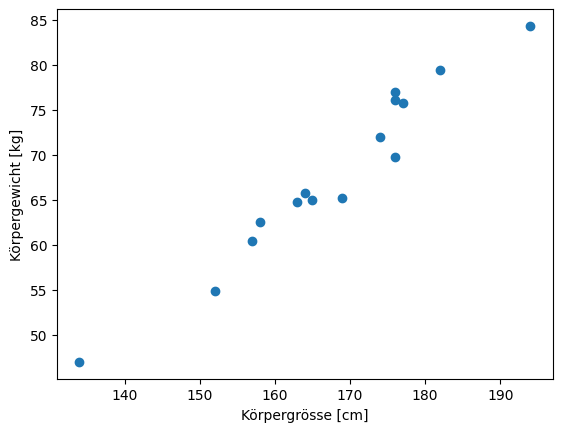

In [4]:
plt.scatter(x, y)
plt.xlabel("Körpergrösse [cm]")
plt.ylabel("Körpergewicht [kg]")

Nun bist du an der Reihe!

### a) Vektoren und Matrizen erstellen

Um die lineare Regression durchführen zu können, brauchen wir die Inputs in geeigneter Form. Erstelle dazu die Design-Matrix $X \in \mathbb{R}^{15\times2}$ und den Vektor $\mathbf{y} \in \mathbb{R}^{15}$, indem du geeignete Numpy-Befehle wie `np.hstack()` oder `.reshape()` benutzt.

In [5]:
# DEIN CODE
# da x,y je auf einer Zeile stehen wir aber alle in eriner Spalte benötigen, transponieren wir die Daten mit np.reshape(-1,1) in eine Spalte 
height = np.array(x).reshape(-1, 1)
weight = np.array(y).reshape(-1, 1)

#jetzt müsssen wir noch die Matrix X erstellen bei der die erste Spalte aus Einsen besteht 
# Dazu erstellen wir die Einsen mit np.ones_like() und stacken die neue spalte mit der x Spalte in der Matrix
X = np.hstack([np.ones_like(height), height])
y = weight

X, y

(array([[  1., 177.],
        [  1., 163.],
        [  1., 176.],
        [  1., 194.],
        [  1., 158.],
        [  1., 176.],
        [  1., 174.],
        [  1., 134.],
        [  1., 157.],
        [  1., 165.],
        [  1., 152.],
        [  1., 182.],
        [  1., 176.],
        [  1., 164.],
        [  1., 169.]]),
 array([[75.7],
        [64.7],
        [69.7],
        [84.3],
        [62.5],
        [77. ],
        [72. ],
        [47. ],
        [60.4],
        [65. ],
        [54.9],
        [79.4],
        [76.1],
        [65.8],
        [65.2]]))

### b) Regressionsgerade bestimmen und einzeichnen

Mit $X$ und $\mathbf{y}$ kannst du nun mit

$$
\boldsymbol{\beta} = (X^T X)^{-1} \, X^T \, \mathbf{y}
$$

die Parameter $\boldsymbol{\beta}$ der Regressionsgerade bestimmen. Gib diese anschliessend aus und interpretiere sie.

In [6]:
# DEIN CODE
beta= np.linalg.inv (X.T@X )  @(X.T)  @y    
beta

array([[-44.53926128],
       [  0.67055579]])

Berechne mit dem gefundenen Regressionsparameter $\boldsymbol{\beta}$ auch die vorhergesagten Werte $\mathbf{\hat{y}}$. Falls du die dazu benötigte Formel nicht mehr auswändig weisst, schaue sie im Skript nach.

**Hinweis:** $\mathbf{\hat{y}}$ hat natürlich die gleichen Dimensionen wie $\mathbf{y}$.

In [7]:
# DEIN CODE
y_hat = X@beta
y_hat

# np.ndim(y) == np.ndim(y_hat)

array([[74.14911325],
       [64.76133222],
       [73.47855746],
       [85.54856165],
       [61.40855327],
       [73.47855746],
       [72.13744589],
       [45.31521436],
       [60.73799749],
       [66.10244379],
       [57.38521854],
       [77.50189219],
       [73.47855746],
       [65.431888  ],
       [68.78466695]])

Kopiere nun den Code für den obigen Scatterplot und visualisiere darin die gefundene Regressionsgerade.

**Hinweis:** Verwende ganz einfach statt $\mathbf{y}$ den Vektor $\mathbf{\hat{y}}$ und benutze die `plot()`- statt die `scatter()`-Funktion.

Text(0, 0.5, 'Körpergewicht [kg]')

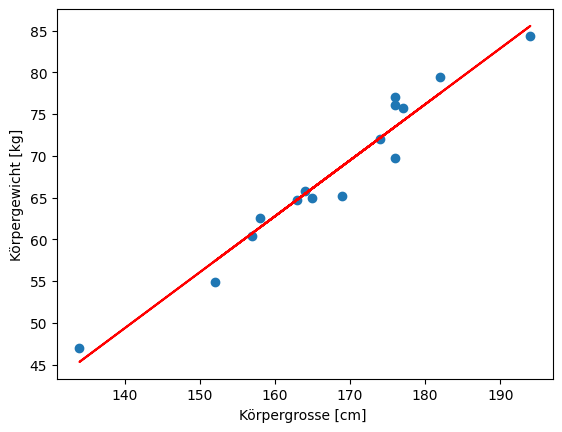

In [8]:
# DEIN CODE
plt.scatter(x,y, label='ursprüngliche Datenpunkte')
plt.plot(x, y_hat, color = "red", label='Regressionsgerade')
plt.xlabel("Körpergrosse [cm] ")                                                # Anpassen
plt.ylabel("Körpergewicht [kg]")                                                # Anpassen

### c) RMSE bestimmen

Im Skript haben wir mit geeigneter Wahl von $\boldsymbol{\beta}$ die 'Loss'-Funktion 

$$
L(\mathbf{\beta}) = \sum_i |y_i - \hat{y}_i|^2 = (\mathbf{y} - \mathbf{\hat{y}})^T \, (\mathbf{y} - \mathbf{\hat{y}})
$$

optimiert. Oft ist statt $L(\mathbf{\beta})$ die Angabe des sogenannten *Root Mean Squared Error (RMSE)* interessanter:

$$
\text{RMSE} = \sqrt{ \frac1n \sum_i |y_i - \hat{y}_i|^2 } = \sqrt{ \frac1n (\mathbf{y} - \mathbf{\hat{y}})^T \, (\mathbf{y} - \mathbf{\hat{y}}) }
$$

Durch das Wurzelziehen hat der Fehler wieder die gleichen Einheiten wie die gesuchte Grösse $y$ (in unserem Fall das Körpergewicht). Berechne das erreichte RMSE mit den berechneten Vorhersagen $\mathbf{\hat{y}}$. Wie stark liegen damit unsere Vorhersagen $\mathbf{\hat{y}}$ durchschnittlich neben der Wahrheit?

In [9]:
# DEIN CODE
y_y_hat = y-y_hat
RSME = np.sqrt((1/len(y))*y_y_hat.T@y_y_hat)
RSME

array([[2.09221852]])

### d) Eigenschaften des Projektionsproblems überprüfen

Im Skript haben wir gezeigt, dass die optimale Regressionsgerade gefunden werden kann, indem das Regressionsproblem als Projektionsproblem auf den Spaltenraum der Design-Matrix $X$ formuliert wird. Hier möchten wir ein paar Annahmen und Resultate daraus überprüfen.

Prüfe als erstes mit dem Skalarprodukt, ob $\mathbf{\hat{y}}$ und $\mathbf{y} - \mathbf{\hat{y}}$ tatsächlich senkrecht zueinander stehen:

In [10]:
# DEIN CODE
skal_prod = np.dot(y_hat.T, y_y_hat)
skal_prod == 0 


array([[False]])

Berechne nun die Projektionsmatrix $H = X \, (X^T X)^{-1} \, X^T$, die jeden Vektor $\mathbf{y}$ auf den Spaltenraum von $X$ projiziert. Was sind ihre Dimensionen?

In [11]:
# DEIN CODE
H = X@np.linalg.inv(X.T@X)@X.T

Zeige, dass $H^2 = H$ und $H$ damit tatsächlich eine Projektionsmatrix ist. 

In [12]:
# DEIN CODE
H_2 = H@H
H_2 == H

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, Fa

Berechne die Eigenwerte von $H$ - was ist an ihnen besonders? Findest du einen Zusammenhang zu einer Übung aus dem Kapitel 1 aus dem Skript?

In [13]:
# DEIN CODE
ew, ev = np.linalg.eig(H)
ew, ev

(array([-1.83354955e-17+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  5.94970457e-19+2.45234255e-17j,
         5.94970457e-19-2.45234255e-17j, -3.27938314e-17+0.00000000e+00j,
         1.53813801e-17+8.24708765e-18j,  1.53813801e-17-8.24708765e-18j,
        -2.46398781e-17+0.00000000e+00j, -1.93676606e-17+0.00000000e+00j,
         3.22912007e-18+4.30482757e-18j,  3.22912007e-18-4.30482757e-18j,
        -3.40527370e-18+0.00000000e+00j, -2.93049632e-19+0.00000000e+00j,
         1.17423593e-33+0.00000000e+00j]),
 array([[-9.50675753e-01+0.j        ,  2.72572330e-01+0.j        ,
          1.13078583e-01+0.j        , -1.54333846e-01-0.03819243j,
         -1.54333846e-01+0.03819243j, -5.08203793e-01+0.j        ,
          3.94979276e-03+0.04018719j,  3.94979276e-03-0.04018719j,
          6.84716321e-01+0.j        , -9.44637654e-01+0.j        ,
          7.04955249e-02+0.12277649j,  7.04955249e-02-0.12277649j,
         -1.95591414e-01+0.j        ,

Und schliesslich wurde im Skript behauptet, dass die Matrix $X^T X$ positiv definit ist. Zeige kurz, dass dieses Eigenschaft für die benutzten Daten tatsächlich zutrifft.

In [14]:
# DEIN CODE
checker = X.T@X
ew = np.linalg.eig(checker)
ew

EigResult(eigenvalues=array([1.01041338e-01, 4.25231899e+05]), eigenvectors=array([[-0.99998248, -0.00591923],
       [ 0.00591923, -0.99998248]]))

### e) Optimierungsproblem visualisieren

Bei dieser Aufgabe musst du nichts tun und kannst einfach den zur Verfügung gestellten Code ausführen. Wir haben im Skript argumentiert, dass der Loss gerade eine Quadrik bildet und das Loss Surface für dich visualisiert. Dies möchten wir hier reproduzieren:

Für ein Grid von $q$ und $m$ verschiedene Loss-Werte berechnen (hochgradig vektorisiert um ineffiziente for-Loops zu vermeiden):

In [15]:
n = 1000
qmin, qmax = beta[0] + np.array([-1.0,1.0])*100
mmin, mmax = beta[1] + np.array([-1.0,1.0])*0.2
q = np.linspace( qmin, qmax, n )
m = np.linspace( mmin, mmax, n )
Q, M = np.meshgrid(q, m)
Beta = np.vstack( [Q.reshape(1,-1), M.reshape(1,-1)] )
L = np.sum( (y - X.dot(Beta))**2, axis=0 ).reshape(n, n)

Loss Surface visualisieren:

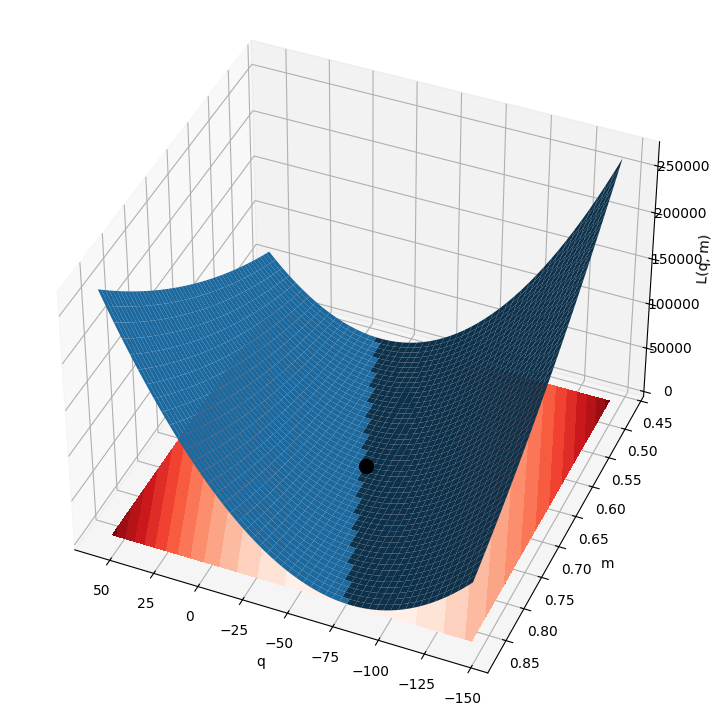

In [16]:
# from mpl_toolkits.mplot3d import Axes3D
plt.figure( figsize=(15,9) )
ax = plt.subplot(1,1,1, projection='3d')
ax.view_init(40, 113)
ax.plot_surface(Q, M, L, linewidth=0.2 )
ax.set_xlabel("q")
ax.set_ylabel("m")
ax.set_zlabel("L(q, m)")

cs = ax.contour( Q, M, L, 15, colors="k", offset=-2 )
ax.contourf( Q, M, L, 15, zdir='z', offset=-2, cmap="Reds" )
ax.plot(beta[0], beta[1], np.min(L), marker="o", markersize=10, c="black", zorder=100)

Dass der schwarze Punkt im Minimum des blauen Loss-Surface liegt, ist nicht ganz offensichtlich. Wir schneiden dazu grosse $y$-Werte weg und ändern die Ansicht auf das Loss Surface mit `ax.view_init()` ein wenig:

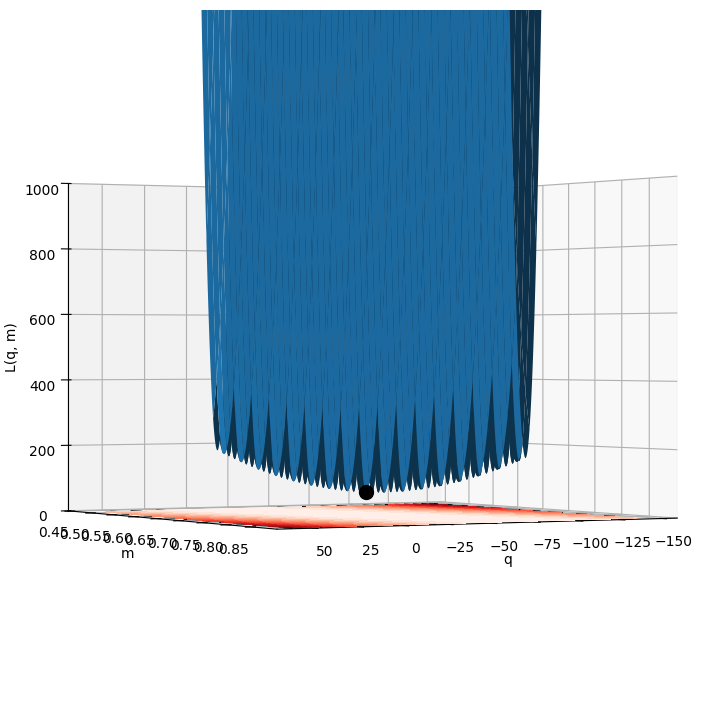

In [17]:
plt.figure( figsize=(15,9) )
ax = plt.subplot(1,1,1, projection='3d')
ax.view_init(0, 60)
ax.plot_surface(Q, M, L, linewidth=0.2 )
ax.set_xlabel("q")
ax.set_ylabel("m")
ax.set_zlabel("L(q, m)")
ax.set_zlim(0, 1000)

cs = ax.contour( Q, M, L, 15, colors="k", offset=-2 )
ax.contourf( Q, M, L, 15, zdir='z', offset=-2, cmap="Reds" )
ax.plot(beta[0], beta[1], np.min(L), marker="o", markersize=10, c="black", zorder=100)

Damit sollte es klarer sein, dass der schwarze Punkt am Punkt des minimalen Werts von $L$ liegt. die welligen Artefakte kommen von der mangelhaften Auflösung im erzeugten Grid.

## Aufgabe 2: Lineare Regression zur Modellierung von nicht-linearen Zusammenhängen

In dieser zweiten Aufgabe werden wir die in Aufgabe 1 benutzte Regressionsformel auch für nicht-lineare Probleme anwenden. Dabei ist anzumerken, dass die lineare Regression trotzdem linear bleibt, denn uns interessiert nicht die modellierte Funktion selbst, sondern die Koeffizienten $\beta_i$ des Regressionsproblems.

Gegeben seien folgende Wertepaare:

In [18]:
w = np.array(
    [[-10. , -21.2], [ -9.5, -12.3], [ -9. ,  -4.2], [ -8.5,   3.7], [ -8. ,   8.2], [ -7.5,   9.7],
     [ -7. ,  16.2], [ -6.5,  27.1], [ -6. ,  27.6], [ -5.5,  23.7], [ -5. ,  27.7], [ -4.5,  29.2],
     [ -4. ,  34.7], [ -3.5,  39.1], [ -3. ,  32.7], [ -2.5,  37.4], [ -2. ,  42. ], [ -1.5,  37.5],
     [ -1. ,  35.9], [ -0.5,  35.9], [  0. ,  36.6], [  0.5,  28.4], [  1. ,  30.2], [  1.5,  28.2],
     [  2. ,  21.1], [  2.5,  25.4], [  3. ,  17.1], [  3.5,  16.3], [  4. ,   3.7], [  4.5,  -4.1]]
)

Text(0, 0.5, 'y')

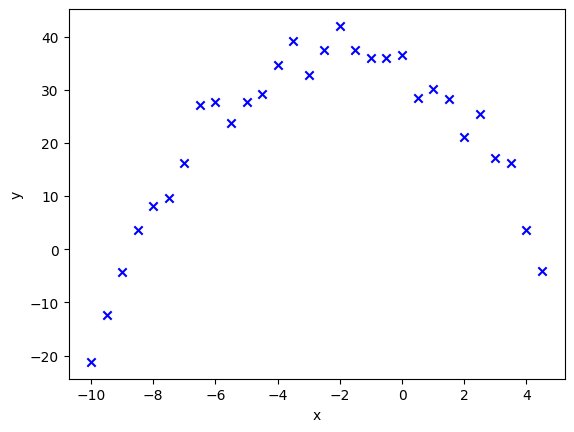

In [19]:
x = w[:,0]
y = w[:,1]
plt.scatter( x, y, marker='x', color="blue" )
plt.xlabel("x")
plt.ylabel("y")

Die Punkte sind in diesem Fall nicht mehr ungefähr entlang einer Gerade verteilt, sondern eher entlang einer Parabel. Wir versuchen dementsprechend, das Regressionsproblem auf quadratische Funktionen in $x$ zu erweitern:

$$
\hat{y}_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2,
$$

oder anders geschrieben

$$
\hat{\mathbf{y}} = \beta_0 + \beta_1 \mathbf{x}_1 + \beta_2 \mathbf{x}_2,
$$

wobei $\mathbf{x}_2$ gerade den *elementweise quadrierten* Werten von $\mathbf{x}_1$ entspricht. Damit haben wir das Problem einer nicht-linearen Regressionsfunktion auf eine multivariate, lineare Regression reduziert! Dementsprechend können wir die optimalen Parameter $\beta_i$ mit der gewohnten Formel finden.

### a) Vektoren und Matrizen erstellen

Erstelle nun wie in der vorherigen Aufgabe die Matrix $X$ und den Vektor $y$. $X$ enthält nun drei Spalten, eine nur mit Einsen, eine mit $\mathbf{x}_1$ und eine mit $\mathbf{x}_2$.

In [20]:
# DEIN CODE
x = np.array(x). reshape(-1,1)
y = np.array(y). reshape(-1,1)

X = np.hstack([np.ones_like(x), x, x**2])
X

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25]])

### b) Regressionskurve bestimmen und einzeichnen

Bestimme damit die optimale Lösung $\boldsymbol{\beta} \in \mathbb{R}^3$ und gib sie aus. Berechne wiederum die Vorhersagen $\mathbf{\hat{y}}$ und stelle die gefundene Regressionskurve graphisch im Scatterplot dar.

$$
\boldsymbol{\beta} = (X^T X)^{-1} \, X^T \, \mathbf{y}
$$

In [21]:
# DEIN CODE
beta = np.linalg.inv(X.T@X)@X.T@y
beta

array([[34.57306988],
       [-3.61352554],
       [-0.88977237]])

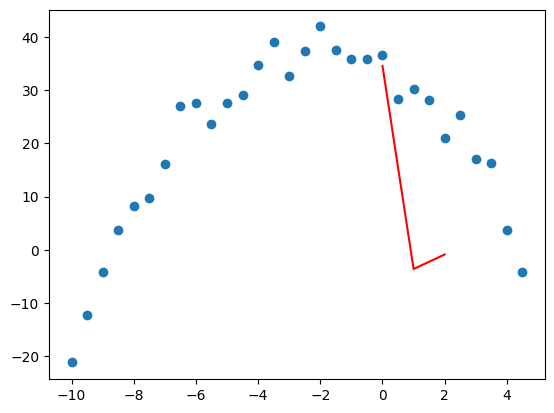

In [22]:
plt.scatter(x, y)
plt.plot(beta, color = "red")

Die Visualisierung des Optimierungsproblems wird jetzt leider schwieriger - für drei Parameter und ein $L$ bräuchten wir einen vierdimensionalen Plot. Trotzdem sieht das Loss Surface wohl ungefähr gleich aus - einfach mit einer Dimension mehr.

## Ausblick

Damit kannst du lineare und auch nicht-lineare Regressionsprobleme mit einfacher linearer Algebra lösen! Damit kennst du übrigens auch bereits praktisch die ganze lineare Algebra, die du für die Implementierung von einfachen neuronalen Netzen brauchst. Lineare Regression ist natürlich noch viel mehr als lineare Algebra: Du möchtest typischerweise auch herausfinden, welche deiner Variablen wirklich wichtig sind ('Feature Selection') und wie vertrauenswürdig die Vorhersagen deines Modells wirklich sind. Dazu brauchst du vor allem Statistik - die zur Berechnung gesuchter Grössen sich aber ebenfalls auf die Werkzeuge der linearen Algebra beruft.

In [23]:
A = np.array([[1,1],[1,2]])
np.linalg.cholesky(A)

array([[1., 0.],
       [1., 1.]])

In [24]:
A = np.array([[3,0,1],[1,-1,1],[1,0,3]])
T = np.array([[1,1,0],[1,0,1],[0,1,1]])
T_inv = np.linalg.inv(T)

T_inv_A_T = T_inv @ A @ T
T_inv_A_T

array([[ 1.,  1., -1.],
       [ 2.,  3.,  2.],
       [-1.,  1.,  1.]])

In [25]:
Q = np.array([[4,-1,-2],[-1,3,-1],[-2,-1,4]])

# Berechne Eigenwerte und Eigenvektoren
eigenvalues = np.linalg.eig(Q)


In [26]:
S = np.array([[4,2],[2,2]])

B_T = np.linalg.cholesky(S)
B = B_T.T

B

array([[2., 1.],
       [0., 1.]])

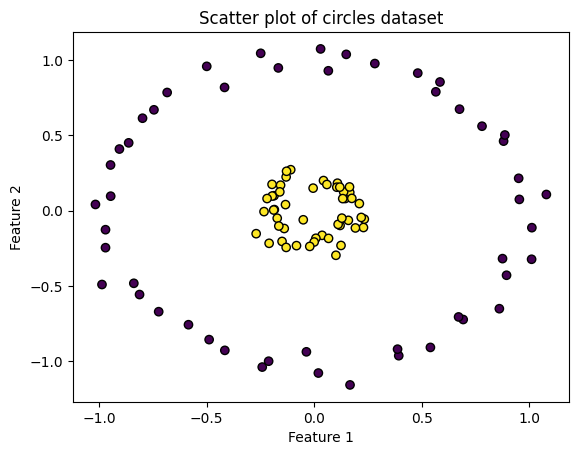

In [27]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate the circles dataset
x, y = make_circles(n_samples=100, factor=0.2, noise=0.05, random_state=0)

# Plot the points, coloring them by their label
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of circles dataset')
plt.show()
